## Project1: MTA 




Our gaol is to open a library with a coffee shop at the stations that has the most number of entries, since the need for comfortable waiting area would be more in the stations that has entries traffic, also we will provide a Book return machine for the customers who wants to continue reading a book in stations that has the most Exits traffic.

We will study the MTA data in a range of 3 months (July/August/September 2021) to decide which stations we should focus on 

### Step1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib.ticker import FuncFormatter
from pandas.api.types import CategoricalDtype
%matplotlib inline

### Step2: Loading 3 Months Data (July/August/September)

In [2]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)
        
week_nums = [210710, 210717, 210724, 210731, 210807, 210814, 210821, 210828, 210904, 210911, 210918, 210925]
turnstiles_df = get_data(week_nums)

### Step3: Data preprocessing (Cleaning) 

In [3]:
# Checking if there is any spaces in columns
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [4]:
# removing any spaces in columns
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [5]:
import datetime

turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
turnstiles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2514588 entries, 0 to 210399
Data columns (total 12 columns):
C/A          object
UNIT         object
SCP          object
STATION      object
LINENAME     object
DIVISION     object
DATE         object
TIME         object
DESC         object
ENTRIES      int64
EXITS        int64
DATE_TIME    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 249.4+ MB


#### Remove Duplicate

In [6]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique (Entries)
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
2494754,S101,R070,00-00-02,ST. GEORGE,2021-09-12 20:00:00,2
514889,J037,R009,00-00-02,121 ST,2021-09-13 08:00:00,2
2267541,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 20:00:00,2
2267542,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-26 00:00:00,2
2494682,S101,R070,00-00-02,ST. GEORGE,2021-09-01 00:00:00,2


In [7]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique (Exits)
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .EXITS.count()
 .reset_index()
 .sort_values("EXITS", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS
2494754,S101,R070,00-00-02,ST. GEORGE,2021-09-12 20:00:00,2
514889,J037,R009,00-00-02,121 ST,2021-09-13 08:00:00,2
2267541,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-25 20:00:00,2
2267542,R516,R291,00-00-02,33 ST-RAWSON ST,2021-08-26 00:00:00,2
2494682,S101,R070,00-00-02,ST. GEORGE,2021-09-01 00:00:00,2


In [8]:
# Get rid of the duplicate entry (Entries/Exits)
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [9]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique (Entries)
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-07-03 00:00:00,1
1676313,R139,R031,04-00-01,34 ST-PENN STA,2021-09-09 12:00:00,1
1676306,R139,R031,04-00-01,34 ST-PENN STA,2021-09-08 08:00:00,1
1676307,R139,R031,04-00-01,34 ST-PENN STA,2021-09-08 12:00:00,1
1676308,R139,R031,04-00-01,34 ST-PENN STA,2021-09-08 16:00:00,1


In [10]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique (Exits)
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .EXITS.count()
 .reset_index()
 .sort_values("EXITS", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS
0,A002,R051,02-00-00,59 ST,2021-07-03 00:00:00,1
1676313,R139,R031,04-00-01,34 ST-PENN STA,2021-09-09 12:00:00,1
1676306,R139,R031,04-00-01,34 ST-PENN STA,2021-09-08 08:00:00,1
1676307,R139,R031,04-00-01,34 ST-PENN STA,2021-09-08 12:00:00,1
1676308,R139,R031,04-00-01,34 ST-PENN STA,2021-09-08 16:00:00,1


#### Finding Daily Entries/Exits

    Daily Entries:-

In [11]:
turnstiles_daily_entries = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())
turnstiles_daily_entries[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily_entries
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))
turnstiles_daily_entries

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,07/03/2021,7596715,NaN,NaN
1,A002,R051,02-00-00,59 ST,07/04/2021,7597078,07/03/2021,7596715.0
2,A002,R051,02-00-00,59 ST,07/05/2021,7597477,07/04/2021,7597078.0
3,A002,R051,02-00-00,59 ST,07/06/2021,7598081,07/05/2021,7597477.0
4,A002,R051,02-00-00,59 ST,07/07/2021,7598741,07/06/2021,7598081.0
...,...,...,...,...,...,...,...,...
419603,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/20/2021,5554,09/19/2021,5554.0
419604,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/21/2021,5554,09/20/2021,5554.0
419605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/22/2021,5554,09/21/2021,5554.0
419606,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/23/2021,5554,09/22/2021,5554.0


In [12]:
#Daily Entries 
turnstiles_daily_entries['DAILY_ENTRIES']= turnstiles_daily_entries['ENTRIES'] - turnstiles_daily_entries['PREV_ENTRIES']
turnstiles_daily_entries.head()


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
0,A002,R051,02-00-00,59 ST,07/03/2021,7596715,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,07/04/2021,7597078,07/03/2021,7596715.0,363.0
2,A002,R051,02-00-00,59 ST,07/05/2021,7597477,07/04/2021,7597078.0,399.0
3,A002,R051,02-00-00,59 ST,07/06/2021,7598081,07/05/2021,7597477.0,604.0
4,A002,R051,02-00-00,59 ST,07/07/2021,7598741,07/06/2021,7598081.0,660.0


In [13]:
# Drop the earliest date in the dataframe
turnstiles_daily_entries.dropna(subset=["PREV_DATE"], axis=0, inplace = True) 
turnstiles_daily_entries.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,07/04/2021,7597078,07/03/2021,7596715.0,363.0
2,A002,R051,02-00-00,59 ST,07/05/2021,7597477,07/04/2021,7597078.0,399.0
3,A002,R051,02-00-00,59 ST,07/06/2021,7598081,07/05/2021,7597477.0,604.0
4,A002,R051,02-00-00,59 ST,07/07/2021,7598741,07/06/2021,7598081.0,660.0
5,A002,R051,02-00-00,59 ST,07/08/2021,7599341,07/07/2021,7598741.0,600.0


    Daily Exits:-

In [14]:
turnstiles_daily_exits = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .EXITS.first())
turnstiles_daily_exits[["PREV_DATE", "PREV_EXITS"]] = (turnstiles_daily_exits
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"]
                                                       .apply(lambda grp: grp.shift(1)))
turnstiles_daily_exits

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
0,A002,R051,02-00-00,59 ST,07/03/2021,2597312,NaN,NaN
1,A002,R051,02-00-00,59 ST,07/04/2021,2597429,07/03/2021,2597312.0
2,A002,R051,02-00-00,59 ST,07/05/2021,2597572,07/04/2021,2597429.0
3,A002,R051,02-00-00,59 ST,07/06/2021,2597822,07/05/2021,2597572.0
4,A002,R051,02-00-00,59 ST,07/07/2021,2598086,07/06/2021,2597822.0
...,...,...,...,...,...,...,...,...
419603,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/20/2021,645,09/19/2021,645.0
419604,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/21/2021,645,09/20/2021,645.0
419605,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/22/2021,645,09/21/2021,645.0
419606,TRAM2,R469,00-05-01,RIT-ROOSEVELT,09/23/2021,645,09/22/2021,645.0


In [15]:
#Daily Exits 
turnstiles_daily_exits['DAILY_EXITS']= turnstiles_daily_exits['EXITS'] - turnstiles_daily_exits['PREV_EXITS']
turnstiles_daily_exits.head()


,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
0,A002,R051,02-00-00,59 ST,07/03/2021,2597312,NaN,NaN,NaN
1,A002,R051,02-00-00,59 ST,07/04/2021,2597429,07/03/2021,2597312.0,117.0
2,A002,R051,02-00-00,59 ST,07/05/2021,2597572,07/04/2021,2597429.0,143.0
3,A002,R051,02-00-00,59 ST,07/06/2021,2597822,07/05/2021,2597572.0,250.0
4,A002,R051,02-00-00,59 ST,07/07/2021,2598086,07/06/2021,2597822.0,264.0


In [16]:
# Drop the earliest date in the dataframe
turnstiles_daily_exits.dropna(subset=["PREV_DATE"], axis=0, inplace = True) 
turnstiles_daily_exits.head()

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
1,A002,R051,02-00-00,59 ST,07/04/2021,2597429,07/03/2021,2597312.0,117.0
2,A002,R051,02-00-00,59 ST,07/05/2021,2597572,07/04/2021,2597429.0,143.0
3,A002,R051,02-00-00,59 ST,07/06/2021,2597822,07/05/2021,2597572.0,250.0
4,A002,R051,02-00-00,59 ST,07/07/2021,2598086,07/06/2021,2597822.0,264.0
5,A002,R051,02-00-00,59 ST,07/08/2021,2598382,07/07/2021,2598086.0,296.0


#### Interlude: Reverse Entries/Exits


    Reverse Entries:-

In [17]:
#Reverse Entries
turnstiles_daily_entries[turnstiles_daily_entries["ENTRIES"] < turnstiles_daily_entries["PREV_ENTRIES"]]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
3277,A011,R080,01-03-00,57 ST-7 AV,07/04/2021,885593112,07/03/2021,885593287.0,-175.0
3278,A011,R080,01-03-00,57 ST-7 AV,07/05/2021,885592916,07/04/2021,885593112.0,-196.0
3279,A011,R080,01-03-00,57 ST-7 AV,07/06/2021,885592645,07/05/2021,885592916.0,-271.0
3280,A011,R080,01-03-00,57 ST-7 AV,07/07/2021,885592373,07/06/2021,885592645.0,-272.0
3281,A011,R080,01-03-00,57 ST-7 AV,07/08/2021,885592062,07/07/2021,885592373.0,-311.0
...,...,...,...,...,...,...,...,...,...
416328,S101,R070,00-00-02,ST. GEORGE,09/03/2021,1213616,09/02/2021,1396473.0,-182857.0
416333,S101,R070,00-00-02,ST. GEORGE,09/08/2021,1214023,09/07/2021,1396898.0,-182875.0
416337,S101,R070,00-00-02,ST. GEORGE,09/12/2021,1214419,09/11/2021,1397475.0,-183056.0
416340,S101,R070,00-00-02,ST. GEORGE,09/15/2021,1214891,09/14/2021,1397903.0,-183012.0


In [18]:
def get_daily_counts(row, max_counter):
    counter= abs(row["ENTRIES"]- row["PREV_ENTRIES"])
    if counter > max_counter:
        counter = row ["ENTRIES"]
    return counter
# if counter is > 1M , then the counter might have been reset.
# just set it to zero as different counters have different cycle limits
#_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=100000)

turnstiles_daily_entries['DAILY_ENTRIES'] = turnstiles_daily_entries.apply(get_daily_counts, axis=1, max_counter = 86400)


In [19]:
turnstiles_daily_entries[turnstiles_daily_entries["ENTRIES"] < turnstiles_daily_entries["PREV_ENTRIES"]]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
3277,A011,R080,01-03-00,57 ST-7 AV,07/04/2021,885593112,07/03/2021,885593287.0,175.0
3278,A011,R080,01-03-00,57 ST-7 AV,07/05/2021,885592916,07/04/2021,885593112.0,196.0
3279,A011,R080,01-03-00,57 ST-7 AV,07/06/2021,885592645,07/05/2021,885592916.0,271.0
3280,A011,R080,01-03-00,57 ST-7 AV,07/07/2021,885592373,07/06/2021,885592645.0,272.0
3281,A011,R080,01-03-00,57 ST-7 AV,07/08/2021,885592062,07/07/2021,885592373.0,311.0
...,...,...,...,...,...,...,...,...,...
416328,S101,R070,00-00-02,ST. GEORGE,09/03/2021,1213616,09/02/2021,1396473.0,1213616.0
416333,S101,R070,00-00-02,ST. GEORGE,09/08/2021,1214023,09/07/2021,1396898.0,1214023.0
416337,S101,R070,00-00-02,ST. GEORGE,09/12/2021,1214419,09/11/2021,1397475.0,1214419.0
416340,S101,R070,00-00-02,ST. GEORGE,09/15/2021,1214891,09/14/2021,1397903.0,1214891.0


    Reverse Exits:-

In [20]:
#Reverse Exits
turnstiles_daily_exits[turnstiles_daily_exits["EXITS"] < turnstiles_daily_exits["PREV_EXITS"]]

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
3277,A011,R080,01-03-00,57 ST-7 AV,07/04/2021,489547192,07/03/2021,489547776.0,-584.0
3278,A011,R080,01-03-00,57 ST-7 AV,07/05/2021,489546514,07/04/2021,489547192.0,-678.0
3279,A011,R080,01-03-00,57 ST-7 AV,07/06/2021,489545533,07/05/2021,489546514.0,-981.0
3280,A011,R080,01-03-00,57 ST-7 AV,07/07/2021,489544517,07/06/2021,489545533.0,-1016.0
3281,A011,R080,01-03-00,57 ST-7 AV,07/08/2021,489543508,07/07/2021,489544517.0,-1009.0
...,...,...,...,...,...,...,...,...,...
416328,S101,R070,00-00-02,ST. GEORGE,09/03/2021,140,09/02/2021,324.0,-184.0
416333,S101,R070,00-00-02,ST. GEORGE,09/08/2021,140,09/07/2021,324.0,-184.0
416337,S101,R070,00-00-02,ST. GEORGE,09/12/2021,140,09/11/2021,324.0,-184.0
416340,S101,R070,00-00-02,ST. GEORGE,09/15/2021,140,09/14/2021,324.0,-184.0


In [21]:
 def get_daily_counts(row, max_counter):
    counter= abs(row["EXITS"]- row["PREV_EXITS"])
    if counter > max_counter:
        counter = row ["EXITS"]
    return counter
# if counter is > 1M , then the counter might have been reset.
# just set it to zero as different counters have different cycle limits
#_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=100000)

turnstiles_daily_exits['DAILY_EXITS'] = turnstiles_daily_exits.apply(get_daily_counts, axis=1, max_counter = 86400)


In [22]:
turnstiles_daily_exits[turnstiles_daily_exits["EXITS"] < turnstiles_daily_exits["PREV_EXITS"]]

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS,DAILY_EXITS
3277,A011,R080,01-03-00,57 ST-7 AV,07/04/2021,489547192,07/03/2021,489547776.0,584.0
3278,A011,R080,01-03-00,57 ST-7 AV,07/05/2021,489546514,07/04/2021,489547192.0,678.0
3279,A011,R080,01-03-00,57 ST-7 AV,07/06/2021,489545533,07/05/2021,489546514.0,981.0
3280,A011,R080,01-03-00,57 ST-7 AV,07/07/2021,489544517,07/06/2021,489545533.0,1016.0
3281,A011,R080,01-03-00,57 ST-7 AV,07/08/2021,489543508,07/07/2021,489544517.0,1009.0
...,...,...,...,...,...,...,...,...,...
416328,S101,R070,00-00-02,ST. GEORGE,09/03/2021,140,09/02/2021,324.0,184.0
416333,S101,R070,00-00-02,ST. GEORGE,09/08/2021,140,09/07/2021,324.0,184.0
416337,S101,R070,00-00-02,ST. GEORGE,09/12/2021,140,09/11/2021,324.0,184.0
416340,S101,R070,00-00-02,ST. GEORGE,09/15/2021,140,09/14/2021,324.0,184.0


#### Finding Daily Time Series For Each STATION

In [23]:
turnstiles_daily_entries.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,07/04/2021,7597078,07/03/2021,7596715.0,363.0
2,A002,R051,02-00-00,59 ST,07/05/2021,7597477,07/04/2021,7597078.0,399.0
3,A002,R051,02-00-00,59 ST,07/06/2021,7598081,07/05/2021,7597477.0,604.0
4,A002,R051,02-00-00,59 ST,07/07/2021,7598741,07/06/2021,7598081.0,660.0
5,A002,R051,02-00-00,59 ST,07/08/2021,7599341,07/07/2021,7598741.0,600.0


In [24]:
#Entries
station_daily_entries = \
(turnstiles_daily_entries.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum()
                 .reset_index())
station_daily_entries.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,07/04/2021,5794.0
1,1 AV,07/05/2021,6683.0
2,1 AV,07/06/2021,7456.0
3,1 AV,07/07/2021,7784.0
4,1 AV,07/08/2021,7863.0


In [25]:
#Exits
station_daily_exits = turnstiles_daily_exits.groupby(["STATION", "DATE"])[['DAILY_EXITS']].sum().reset_index()
station_daily_exits.head()

,STATION,DATE,DAILY_EXITS
0,1 AV,07/04/2021,10073.0
1,1 AV,07/05/2021,12176.0
2,1 AV,07/06/2021,12816.0
3,1 AV,07/07/2021,13418.0
4,1 AV,07/08/2021,13492.0


In [26]:
station_daily_exits = station_daily_exits[station_daily_exits.DAILY_EXITS<=10000]


In [27]:
station_totals_exits = station_daily_exits.groupby('STATION').sum()\
    .sort_values('DAILY_EXITS', ascending=False)\
    .reset_index()
    
station_totals_exits.head()

,STATION,DAILY_EXITS
0,167 ST,640907.0
1,MYRTLE-WYCKOFF,639876.0
2,GROVE STREET,637276.0
3,CONEY IS-STILLW,612170.0
4,BROADWAY,605540.0


#### Remove Weekend Rows From Entries

      In Entries we just focus on the Weekdays from Monday - Friday, since we want open a metro library in the stations that has he most entries traffic

In [28]:
station_daily_entries['DATE'] = pd.to_datetime(station_daily_entries['DATE'])
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

station_daily_entries['DAY_OF_WEEK_NUM'] = station_daily_entries["DATE"].apply(lambda x: x.weekday())
station_daily_entries['DAY_OF_WEEK'] = station_daily_entries["DAY_OF_WEEK_NUM"].apply(lambda x: weekdays[x]).astype(
    CategoricalDtype(weekdays, ordered=True))
station_daily_entries['DAY_OF_WEEK_SUMMARY'] = station_daily_entries["DAY_OF_WEEK_NUM"].apply(lambda x: "Weekend" if int(x) >= 5 else "Weekday")

# Dropping previous column since it's not needed now
# df.drop(columns=["WEEKDAY_NUM"], inplace = True)
# df['DAY_OF_WEEK'] = [date.weekday() for date in df["DATE"].tolist()]

In [29]:
station_daily_entries

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,DAY_OF_WEEK,DAY_OF_WEEK_SUMMARY
0,1 AV,2021-07-04,5794.0,6,Sunday,Weekend
1,1 AV,2021-07-05,6683.0,0,Monday,Weekday
2,1 AV,2021-07-06,7456.0,1,Tuesday,Weekday
3,1 AV,2021-07-07,7784.0,2,Wednesday,Weekday
4,1 AV,2021-07-08,7863.0,3,Thursday,Weekday
...,...,...,...,...,...,...
31421,ZEREGA AV,2021-09-20,1408.0,0,Monday,Weekday
31422,ZEREGA AV,2021-09-21,1428.0,1,Tuesday,Weekday
31423,ZEREGA AV,2021-09-22,1463.0,2,Wednesday,Weekday
31424,ZEREGA AV,2021-09-23,1433.0,3,Thursday,Weekday


In [30]:
station_daily_entries = station_daily_entries[station_daily_entries["DAY_OF_WEEK_SUMMARY"]!="Weekend"]

In [31]:
station_daily_entries

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,DAY_OF_WEEK,DAY_OF_WEEK_SUMMARY
1,1 AV,2021-07-05,6683.0,0,Monday,Weekday
2,1 AV,2021-07-06,7456.0,1,Tuesday,Weekday
3,1 AV,2021-07-07,7784.0,2,Wednesday,Weekday
4,1 AV,2021-07-08,7863.0,3,Thursday,Weekday
5,1 AV,2021-07-09,7844.0,4,Friday,Weekday
...,...,...,...,...,...,...
31421,ZEREGA AV,2021-09-20,1408.0,0,Monday,Weekday
31422,ZEREGA AV,2021-09-21,1428.0,1,Tuesday,Weekday
31423,ZEREGA AV,2021-09-22,1463.0,2,Wednesday,Weekday
31424,ZEREGA AV,2021-09-23,1433.0,3,Thursday,Weekday


In [32]:
station_daily_entries =station_daily_entries.drop("DAY_OF_WEEK_SUMMARY", axis=1)
station_daily_entries =station_daily_entries.drop("DAY_OF_WEEK", axis=1)
station_daily_entries =station_daily_entries.drop("DAY_OF_WEEK_NUM", axis=1)

station_daily_entries

,STATION,DATE,DAILY_ENTRIES
1,1 AV,2021-07-05,6683.0
2,1 AV,2021-07-06,7456.0
3,1 AV,2021-07-07,7784.0
4,1 AV,2021-07-08,7863.0
5,1 AV,2021-07-09,7844.0
...,...,...,...
31421,ZEREGA AV,2021-09-20,1408.0
31422,ZEREGA AV,2021-09-21,1428.0
31423,ZEREGA AV,2021-09-22,1463.0
31424,ZEREGA AV,2021-09-23,1433.0


In [33]:
station_daily_entries = station_daily_entries[station_daily_entries.DAILY_ENTRIES<=10000]

In [34]:
station_totals_entries = station_daily_entries.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals_entries

,STATION,DAILY_ENTRIES
0,NOSTRAND AV,493672.0
1,167 ST,489444.0
2,GROVE STREET,483358.0
3,61 ST WOODSIDE,479811.0
4,82 ST-JACKSON H,479509.0
...,...,...
355,8 AV,9616.0
356,BEACH 105 ST,8525.0
357,BROAD CHANNEL,8076.0
358,FLUSHING-MAIN,2636.0


In [35]:
station_totals_entries

,STATION,DAILY_ENTRIES
0,NOSTRAND AV,493672.0
1,167 ST,489444.0
2,GROVE STREET,483358.0
3,61 ST WOODSIDE,479811.0
4,82 ST-JACKSON H,479509.0
...,...,...
355,8 AV,9616.0
356,BEACH 105 ST,8525.0
357,BROAD CHANNEL,8076.0
358,FLUSHING-MAIN,2636.0


### Step4: Data Visualization

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt

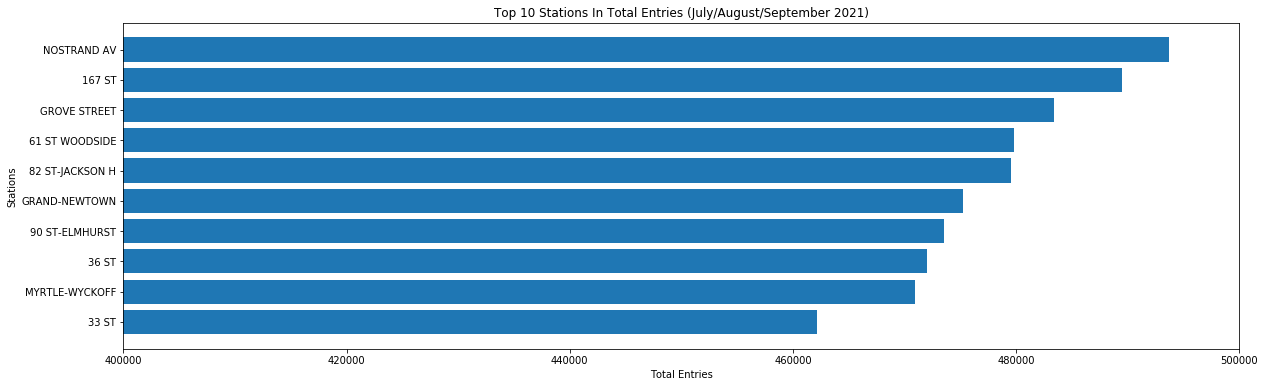

In [37]:
#Here it describs the top 10 stations with the most entries in weekdays without weekends
fig, ax = plt.subplots(figsize=(20, 6))

plt.barh(y=station_totals_entries['STATION'][:10], width=station_totals_entries['DAILY_ENTRIES'][:10])

ax.invert_yaxis()
ax.set_xlim(400000,500000 )

plt.xlabel("Total Entries")
plt.ylabel("Stations")
plt.title("Top 10 Stations In Total Entries (July/August/September 2021)")
plt.show()

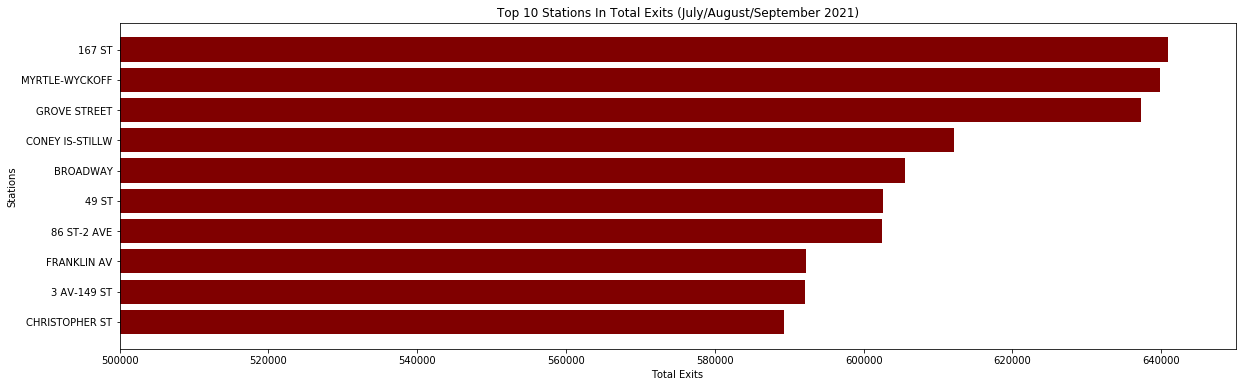

In [38]:
#Here it describs the top 10 stations with the most exits in all 7 weekdays

fig, ax = plt.subplots(figsize=(20, 6))

plt.barh(y=station_totals_exits['STATION'][:10], width=station_totals_exits['DAILY_EXITS'][:10], color='maroon')

ax.invert_yaxis()
ax.set_xlim(500000,650000 )

plt.xlabel("Total Exits")
plt.ylabel("Stations")
plt.title("Top 10 Stations In Total Exits (July/August/September 2021)")
plt.show()


### Findings 

We conclude that:

We should open a metro library/cafe in the following stations:-

    -NOSTRAND AV
    - 167 ST
    - GROVE STREET
    - 61 ST WOODSIDE
    - 82 ST-JACKSON H
    - GRAND-NEWTOWN
    - 90 ST-ELMHURST
    - 36 ST
    - MYRTLE-WYCKOFF
    - 33 ST
    
We should provide book return machines in the followeing stations:-

    - NOSTRAND AV
    - 167 ST
    - GROVE STREET
    - 61 ST WOODSIDE
    - 82 ST-JACKSON H
    - GRAND-NEWTOWN
    - 90 ST-ELMHURST
    - 36 ST
    - MYRTLE-WYCKOFF
    - 33 ST	
